In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, Sequential, optimizers, layers

### 1. 准备数据

In [17]:
(x_train_all, y_train_all), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


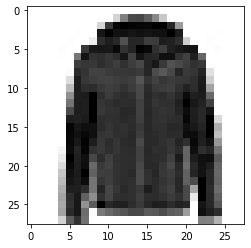

In [18]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap='binary')

show_single_image(x_train[0])

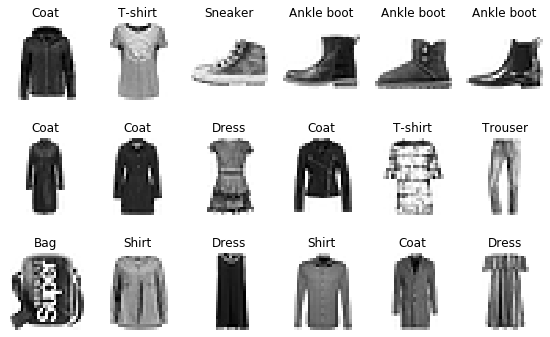

In [19]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.6, n_rows*2))
    
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 6, x_train, y_train, class_names)

In [20]:
# plt.subplot?

### 2. 构建模型

In [21]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
optimizer = optimizers.SGD(learning_rate=0.001)
# reason for sparse: y->index. y->one_hot->[] 
# 通过 sparse 可以使 y 变为向量
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [22]:
# model.compile?

In [23]:
model.layers

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [26]:
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/7
55000/55000 [==============================] - 8s 151us/sample - loss: 3.2781 - accuracy: 0.6620 - val_loss: 0.7568 - val_accuracy: 0.7206
Epoch 2/7
55000/55000 [==============================] - 8s 140us/sample - loss: 0.6693 - accuracy: 0.7546 - val_loss: 0.6390 - val_accuracy: 0.7788
Epoch 3/7
55000/55000 [==============================] - 7s 118us/sample - loss: 0.5871 - accuracy: 0.7775 - val_loss: 0.6092 - val_accuracy: 0.7896
Epoch 4/7
55000/55000 [==============================] - 7s 120us/sample - loss: 0.5423 - accuracy: 0.7914 - val_loss: 0.5939 - val_accuracy: 0.7714
Epoch 5/7
55000/55000 [==============================] - 6s 103us/sample - loss: 0.5088 - accuracy: 0.8027 - val_loss: 0.5317 - val_accuracy: 0.8108
Epoch 6/7
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4868 - accuracy: 0.8058 - val_loss: 0.5386 - val_accuracy: 0.7960
Epoch 7/7
55000/55000 [==============================] - 

In [27]:
type(history)

tensorflow.python.keras.callbacks.History

In [28]:
history.history

{'loss': [3.2781404403946617,
  0.6692780406431719,
  0.5871096882083199,
  0.5422510275537318,
  0.5088391130100597,
  0.4868153126456521,
  0.4669234927762638],
 'accuracy': [0.66203636,
  0.7545818,
  0.77754545,
  0.79138184,
  0.80265456,
  0.80576366,
  0.81569093],
 'val_loss': [0.7568409071445465,
  0.6389517971515656,
  0.6091717918395996,
  0.5939448750972748,
  0.5316926191806793,
  0.5385693254470825,
  0.522215585899353],
 'val_accuracy': [0.7206, 0.7788, 0.7896, 0.7714, 0.8108, 0.796, 0.8184]}

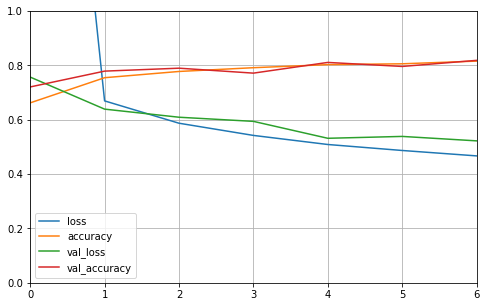

In [29]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)

plot_learning_curves(history)

In [31]:
model.evaluate(x_test, y_test, verbose=0)

[0.5528067940235138, 0.8063]